### Introduction

Notebook to analyse the PyBossa taskruns from the Volunteers App. The analysis made on this notebook is needed once a number of volunteers participating of the empirical study, changed during the execution time, becoming necessary to rerun some tasks to distribute more equally the amount of tasks by volunteer.

The final amount should be around 10 tasks/volunteer.

### Load Libraries and Data

In [40]:
import pandas as pd
import seaborn as sns

taskruns = pd.read_csv('../data/mozilla_firefox_v2/firefoxDataset/br_feat_recovery_empirical_study/pybossa-apps/recover_taskruns/taskruns.csv')
print('TaskRuns shape: {}'.format(taskruns.shape))

TaskRuns shape: (63, 10)


In [8]:
taskruns.head()

,bug_id,user_id,task_id,created,finish_time,user_ip,link,timeout,project_id,id
0,1181835,None,1628,2019-02-22T13:30:47.532426,2019-02-22T13:34:43.593370,148.58.130.242,<link rel='self' title='taskrun' href='http://...,None,7,143
1,1248267,None,1629,2019-02-22T13:30:47.612225,2019-02-22T13:36:41.537585,148.58.130.242,<link rel='self' title='taskrun' href='http://...,None,7,144
2,1248268,None,1630,2019-02-22T13:34:43.629663,2019-02-22T13:37:54.519444,148.58.130.242,<link rel='self' title='taskrun' href='http://...,None,7,145
3,1257087,None,1631,2019-02-22T13:36:41.567089,2019-02-22T13:38:58.780731,148.58.130.242,<link rel='self' title='taskrun' href='http://...,None,7,146
4,1264988,None,1632,2019-02-22T13:37:54.548454,2019-02-22T13:40:18.103423,148.58.130.242,<link rel='self' title='taskrun' href='http://...,None,7,147


### Selecting Tasks to Rerun

In [17]:
taskruns['created'] = pd.to_datetime(taskruns['created'], yearfirst=True)
taskruns['created_month'] = taskruns.apply(lambda row: row['created'].month, axis=1)
taskruns['created_day'] = taskruns.apply(lambda row: row['created'].day, axis=1)
taskruns['created_hour'] = taskruns.apply(lambda row: row['created'].hour, axis=1)

grouped_trs = taskruns.groupby(by=['created_month','created_day','created_hour']).count()
grouped_trs

bug_id  user_id  task_id  created  \
created_month created_day created_hour                                      
2             22          13                15       15       15       15   
                          14                 7        7        7        7   
                          15                 8        8        8        8   
              25          12                12       12       12       12   
                          18                20       20       20       20   
                          19                 1        1        1        1   

                                        finish_time  user_ip  link  timeout  \
created_month created_day created_hour                                        
2             22          13                     15       15    15       15   
                          14                      7        7     7        7   
                          15                      8        8     8        8   
              25          12                     12       12    12       12   
                          18                     20       20    20       20   
                          19                      1        1     1        1   

                                        project_id  id  
created_month created_day created_hour                  
2             22          13                    15  15  
                          14                     7   7  
                          15                     8   8  
              25          12                    12  12  
                          18                    20  20  
                          19                     1   1

#### **Volunteers Contributions**

In [39]:
trs_lucas = taskruns[(taskruns.created_day == 22) & (taskruns.created_hour==13)].loc[:,'task_id']
trs_marcos = taskruns[(taskruns.created_day == 22) & ((taskruns.created_hour==14) | (taskruns.created_hour == 15))].loc[:,'task_id']
trs_diego = taskruns[(taskruns.created_day == 25) & (taskruns.created_hour==12)].loc[:,'task_id']
trs_isabelly = taskruns[(taskruns.created_day == 25) & ((taskruns.created_hour==18) | (taskruns.created_hour == 19))].loc[:,'task_id']

contri_df = pd.DataFrame(columns=['contributor','answers'])
contri_df['contributor'] = ['Lucas', 'Marcos', 'Diego', 'Isabelly']
contri_df['answers'] = [trs_lucas.values, trs_marcos.values, trs_diego.values, trs_isabelly.values]
contri_df['amount_answered'] = contri_df.apply(lambda row : len(row['answers']), axis=1)
contri_df

,contributor,answers,amount_answered
0,Lucas,"[1628, 1629, 1630, 1631, 1632, 1633, 1634, 163...",15
1,Marcos,"[1643, 1644, 1645, 1646, 1647, 1648, 1649, 165...",15
2,Diego,"[1658, 1659, 1660, 1661, 1662, 1663, 1664, 166...",12
3,Isabelly,"[1670, 1671, 1672, 1673, 1674, 1675, 1676, 167...",21


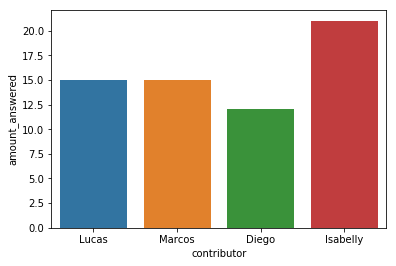

In [45]:
sns.barplot(data=contri_df, y=contri_df['amount_answered'], x=contri_df['contributor'])

### Expected composition of resolution of tasks:

* Lucas:    11 tasks
* Marcos:   11 tasks
* Diego:    10 tasks
* Isabelly: 11 tasks
* MatheusB: 10 tasks
* MatheusG: 10 tasks
* Anderson: 10 tasks
* Wesley:   10 tasks
* Jaziel:   10 tasks

**Total: 93 tasks**

In [62]:
contrib_10 = ['Diego','Anderson','MatheusG','MatheusB','Wesley','Jaziel']
contrib_11 = ['Lucas','Marcos','Isabelly']

def tasks_to_rerun(row):
    if row['contributor'] in contrib_10:
        if len(row['answers']) > 10:
            return row['answers'][10:]
        else:
            return []
    else:
        if row['contributor'] in contrib_11:
            if len(row['answers']) > 11:
                return row['answers'][11:]
            else:
                return []

contri_df['tasks_to_rerun'] = contri_df.apply(lambda row : tasks_to_rerun(row), axis=1)
contri_df['solved_tasks_range'] = contri_df.apply(lambda row : (row['answers'][0], row['answers'][-1]), axis=1)
contri_df

,contributor,answers,amount_answered,tasks_to_rerun,solved_tasks_range
0,Lucas,"[1628, 1629, 1630, 1631, 1632, 1633, 1634, 163...",15,"[1639, 1640, 1641, 1642]","(1628, 1642)"
1,Marcos,"[1643, 1644, 1645, 1646, 1647, 1648, 1649, 165...",15,"[1654, 1655, 1656, 1657]","(1643, 1657)"
2,Diego,"[1658, 1659, 1660, 1661, 1662, 1663, 1664, 166...",12,"[1668, 1669]","(1658, 1669)"
3,Isabelly,"[1670, 1671, 1672, 1673, 1674, 1675, 1676, 167...",21,"[1681, 1682, 1683, 1684, 1685, 1686, 1687, 168...","(1670, 1690)"


In [67]:
for arr in contri_df.tasks_to_rerun.values:
    print('Tasks to Rerun: {}'.format(arr))

Tasks to Rerun: [1639 1640 1641 1642]
Tasks to Rerun: [1654 1655 1656 1657]
Tasks to Rerun: [1668 1669]
Tasks to Rerun: [1681 1682 1683 1684 1685 1686 1687 1688 1689 1690]
